In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf



In [3]:
start = '2014-01-01'
end = '2024-10-21'
stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2014-01-02 00:00:00+00:00,27.656164,27.724083,27.839401,27.603037,27.782366,73129082
2014-01-03 00:00:00+00:00,27.454418,27.521841,27.818977,27.520098,27.770908,66917888
2014-01-06 00:00:00+00:00,27.760517,27.828691,27.867046,27.557707,27.721344,71037271
2014-01-07 00:00:00+00:00,28.295689,28.365179,28.385853,27.924334,28.019974,102486711
2014-01-08 00:00:00+00:00,28.354576,28.424210,28.575891,28.226450,28.543015,90036218
...,...,...,...,...,...,...
2024-10-14 00:00:00+00:00,166.350006,166.350006,167.619995,164.779999,164.910004,9981800
2024-10-15 00:00:00+00:00,166.899994,166.899994,169.089996,166.050003,167.139999,14829300


In [5]:
data.reset_index(inplace=True)

In [6]:
data


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02 00:00:00+00:00,27.656164,27.724083,27.839401,27.603037,27.782366,73129082
1,2014-01-03 00:00:00+00:00,27.454418,27.521841,27.818977,27.520098,27.770908,66917888
2,2014-01-06 00:00:00+00:00,27.760517,27.828691,27.867046,27.557707,27.721344,71037271
3,2014-01-07 00:00:00+00:00,28.295689,28.365179,28.385853,27.924334,28.019974,102486711
4,2014-01-08 00:00:00+00:00,28.354576,28.424210,28.575891,28.226450,28.543015,90036218
...,...,...,...,...,...,...,...
2713,2024-10-14 00:00:00+00:00,166.350006,166.350006,167.619995,164.779999,164.910004,9981800
2714,2024-10-15 00:00:00+00:00,166.899994,166.899994,169.089996,166.050003,167.139999,14829300
2715,2024-10-16 00:00:00+00:00,166.740005,166.740005,167.279999,165.216003,166.029999,9968500


In [7]:
ma_100_days = data.Close.rolling(100).mean() 

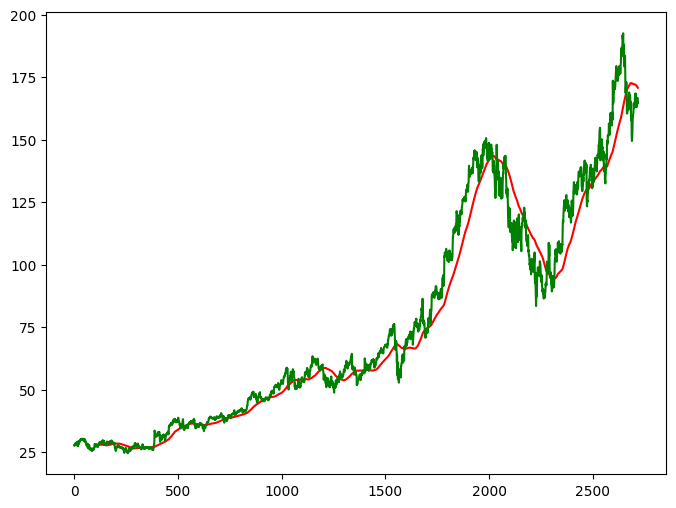

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close ,'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()


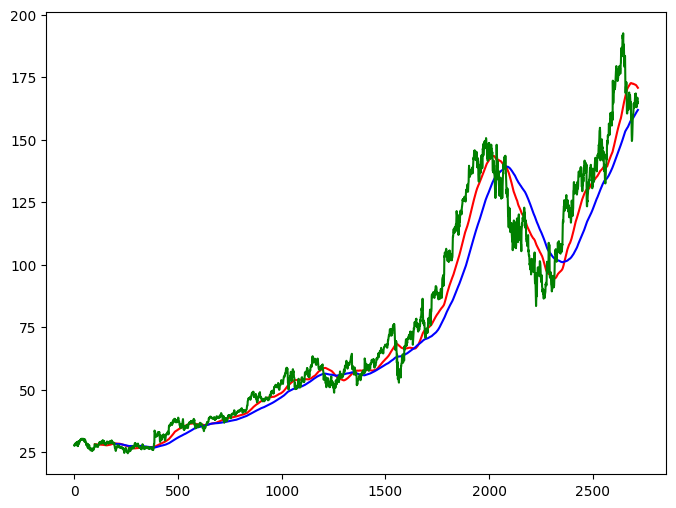

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close , 'g')
plt.show()

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape[0]


2174

In [13]:
data_test.shape[0]

544

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
from keras.layers import Dense,Dropout, LSTM, Input
from keras.models import Sequential


In [18]:
x,y = np.array(x),np.array(y)

In [19]:
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))  
model.add(LSTM(units=50,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [21]:
model.fit(x,y,epochs = 50, batch_size =32,verbose =1)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - loss: 0.0746
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 0.0080
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 0.0057
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.0051
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - loss: 0.0051
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - loss: 0.0055
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0052
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 0.0046
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - loss: 0.0038
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - loss: 0.0035
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0044
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0036
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 0.0034
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - loss: 0.0030
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [22]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [26]:
data_test_scale = scaler.fit_transform(data_test)


In [31]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [32]:
y_predict = model.predict(x)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [37]:
scale=1/scaler.scale_

In [38]:
y_predict = y_predict*scale

In [39]:
y = y*scale

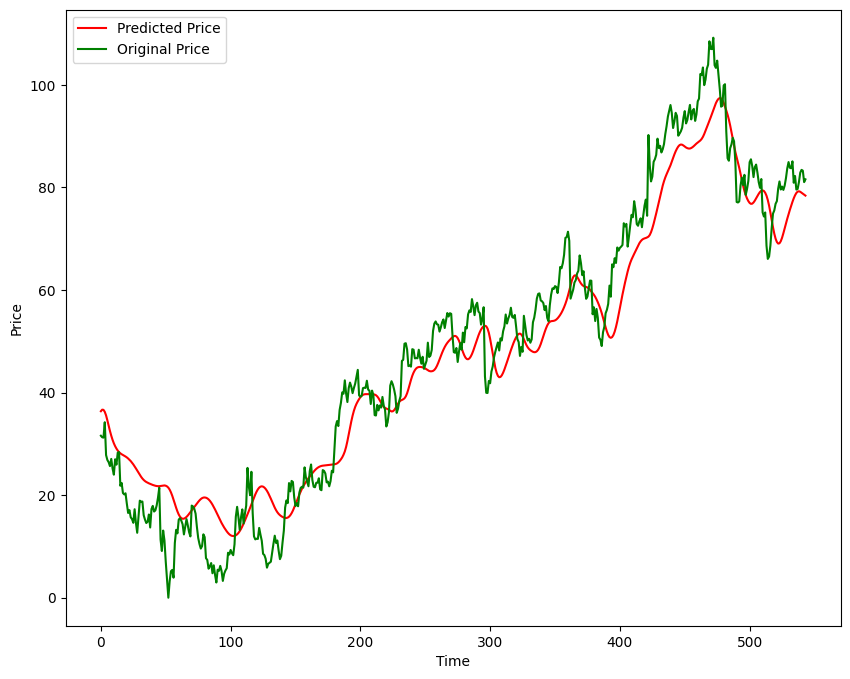

In [41]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1]:
model.save('Stock Prediction Model.keras')

NameError: name 'model' is not defined